# Spam Email Detection Project 

importing libraries

In [1]:
import numpy as np
import pandas as pd
import random

## Step 1: Data Exploration

Read emails from data\emails.csv file to a panda dataframe 

In [2]:
# Read data
emails_df = pd.read_csv("data\emails.csv")

# Show top 5 rows
emails_df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# print shape (rows, columns)
emails_df.shape

(5572, 2)

In [4]:
# print columns names
emails_df.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
# Show number of missing data
print("{} # of missinf \'na\' data".format(emails_df.isna().sum().sum()))
print("{} # of missinf \'null\' data".format(emails_df.isnull().sum().sum()))

0 # of missinf 'na' data
0 # of missinf 'null' data


In [7]:
# Check for duplicate and remove them
r = emails_df.shape[0]
emails_df.drop_duplicates(inplace=True)
num_dup = r - emails_df.shape[0]
print("{} # of duplcates got removed from the data".format(num_dup))
print("{} # of examples".format(emails_df.shape[0]))


0 # of duplcates got removed from the data
5157 # of examples


Encode the target label

In [8]:
# print unique values
emails_df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [10]:
# Encode ham as 0 and spam as 1
emails_df["Category"].loc[ emails_df["Category"] == 'ham'] = 0
emails_df["Category"].loc[ emails_df["Category"] == 'spam'] = 1

In [11]:
# print unique value again
emails_df.Category.unique()

array([0, 1], dtype=object)

In [12]:
emails_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [13]:
emails_df.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,0,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


## Step 2: Data Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

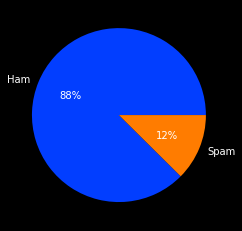

In [16]:
# Show the percentage of spam and not spam emails
#fig = plt.figure(figsize=(10,7))
colors = sns.color_palette('bright')
plt.pie(emails_df["Category"].value_counts(), labels= ['Ham', 'Spam'], colors=colors, autopct='%.0f%%')
plt.show()

Data Preprocessing includes:
1. Lower case
2. Remove special characters
3. Remove stop words and punctuations 
4. Stemming

In [23]:
import nltk
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
# 1. Lowercasing
emails_df["trnsformed_txt"] = emails_df["Message"].apply(str.lower)

In [25]:
# 2. Remove special characters
def remove_special(text):
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        if(token.isalnum()):
            cleaned_tokens.append(token)
    return " ".join(cleaned_tokens)

print(remove_special("@abbas hommadi ,from #iraq, has msc in cs"))

abbas hommadi from iraq has msc in cs


In [26]:
emails_df["trnsformed_txt"] = emails_df["trnsformed_txt"].apply(remove_special)
emails_df.iloc[random.randint(0,emails_df.shape[0])]

Category                                                          0
Message           I wan but too early lei... Me outside now wun ...
trnsformed_txt    i wan but too early lei me outside now wun b h...
Name: 1652, dtype: object

In [30]:
# 3. Remove stop words and punctuations
from nltk.corpus import stopwords
import string
def remove_stop_words_punc(text):
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords.words("english") and token not in string.punctuation:
                cleaned_tokens.append(token)
    return " ".join(cleaned_tokens)
remove_stop_words_punc("i love my daughers miral and tolay:)")

'love daughers miral tolay'

## Step 3: Feature Extraction

In [43]:
# Convert email raw text to feature vector
# TF-IDF is a method to featurize each word within the document and across all documents in the corpus
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extractor = TfidfVectorizer(stop_words='english', lowercase=True)
X = feature_extractor.fit_transform(emails_df['Message']).astype('float')
Y = emails_df['Category'].astype('int32')

In [44]:
print("X shape is {}".format(X.shape))
print("Y shape is {}".format(Y.shape))

X shape is (5157, 8440)
Y shape is (5157,)


## Step 3: Build Model

In [46]:
# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X,Y,test_size=0.2, random_state=88)

In [49]:
# Build logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## Step 4: Evaluation and Results

In [52]:
# Get the predicted y using our trained model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [53]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_train = accuracy_score(y_true=Y_train, y_pred=y_pred_train)
accuracy_test = accuracy_score(y_true=Y_test, y_pred=y_pred_test)

print("Training accuracy is {}".format(accuracy_train))
print("Test accuracy is {}".format(accuracy_test))

Training accuracy is 0.9641212121212122
Test accuracy is 0.9515503875968992


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_true=Y_test, y_pred=y_pred_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       915
           1       1.00      0.57      0.73       117

    accuracy                           0.95      1032
   macro avg       0.97      0.79      0.85      1032
weighted avg       0.95      0.95      0.95      1032



c:\Users\MSI\anaconda3\envs\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


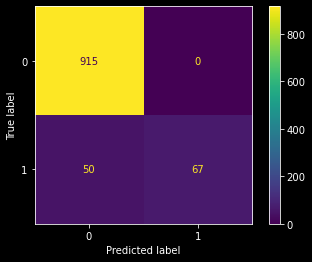

In [60]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test,Y_test)